In [2]:
from matplotlib import pyplot as plt
%matplotlib notebook
import numpy as np
from skimage.io import imread,imsave

(800, 1200, 3)


<IPython.core.display.Javascript object>


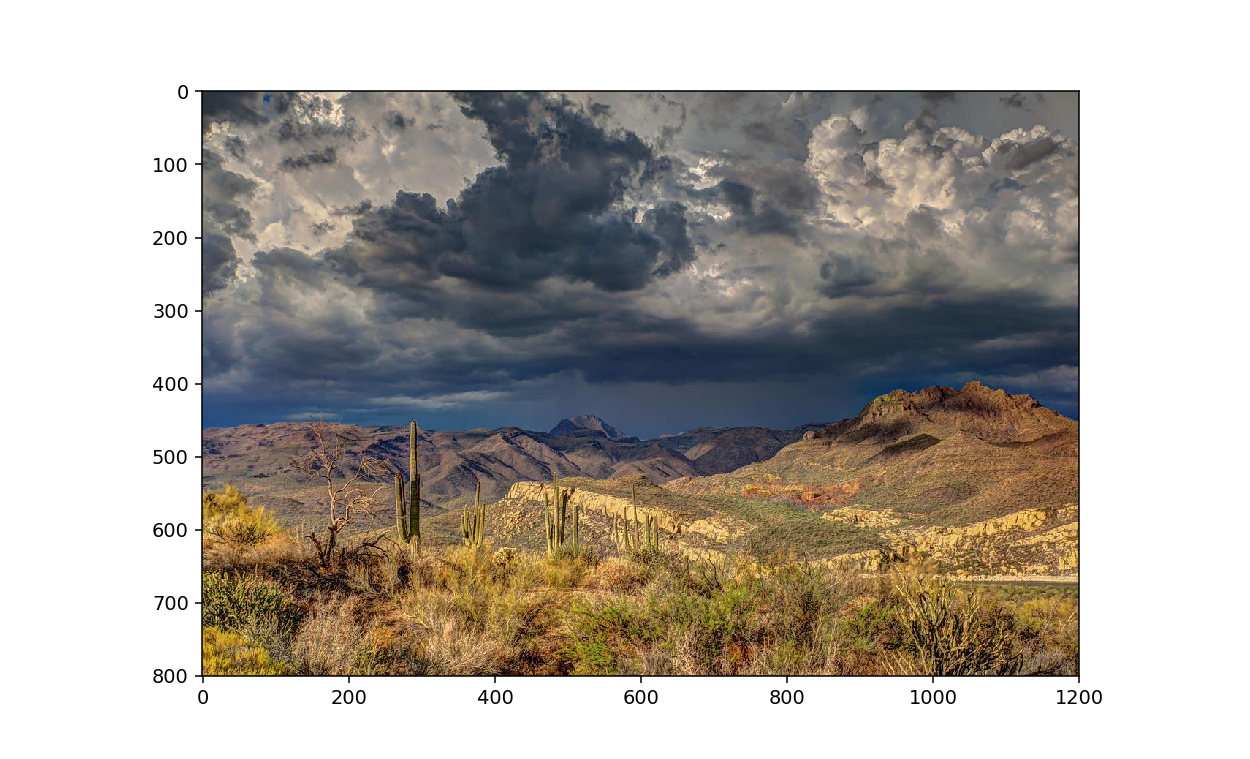

In [3]:
im = imread('desert.jpg')
print(im.shape)

plt.figure()
plt.imshow(im)
plt.show()

<IPython.core.display.Javascript object>


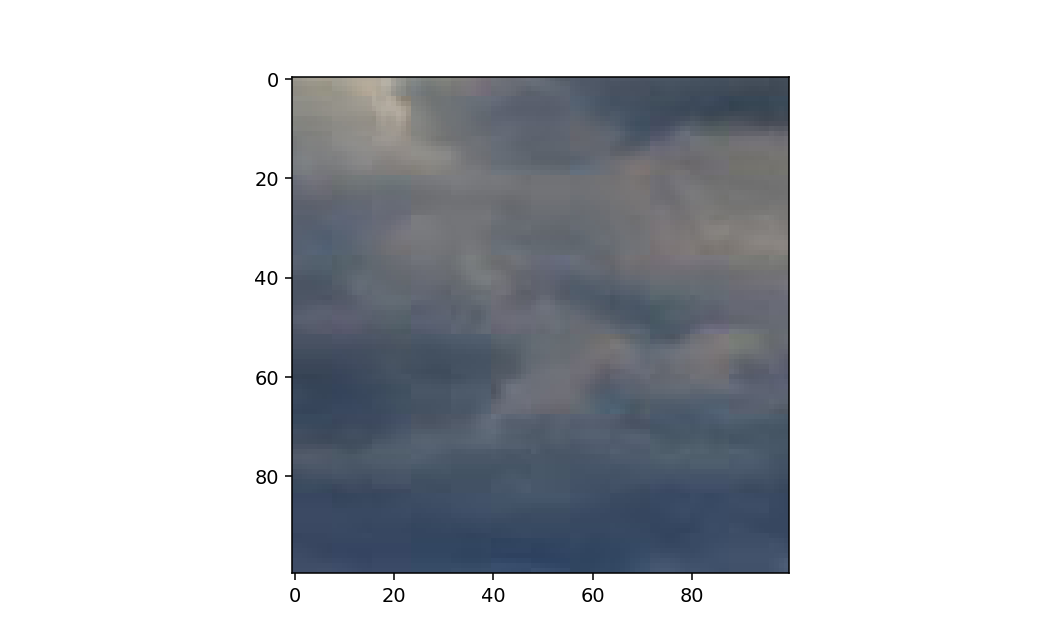

In [4]:
x = 200
y = 300

nsize = (100,100)
region = im[y:y+nsize[0],x:x+nsize[1]]
plt.figure()
plt.imshow(region)
plt.show()

In [5]:
from skimage.filters import sobel

def get_descr(region):
    return [sobel(region[:,:,0]).sum(), sobel(region[:,:,1]).sum(), sobel(region[:,:,2]).sum()]

print(get_descr(region))

[143.9171482843133, 119.66519201739864, 106.68060908658975]


In [6]:
n_cells_x = 15
n_cells_y = 10
size_x = im.shape[1]//n_cells_x
size_y = im.shape[0]//n_cells_y
print(size_x,size_y)

80 80


In [7]:
descriptors = np.zeros((n_cells_y,n_cells_x,3))
for y in range(n_cells_y):
    for x in range(n_cells_x):
        region = im[y*size_y:(y+1)*size_y,x*size_x:(x+1)*size_x]
        descriptors[y,x] = get_descr(region)

[994.28698212 982.92409837 802.25921418]


<IPython.core.display.Javascript object>


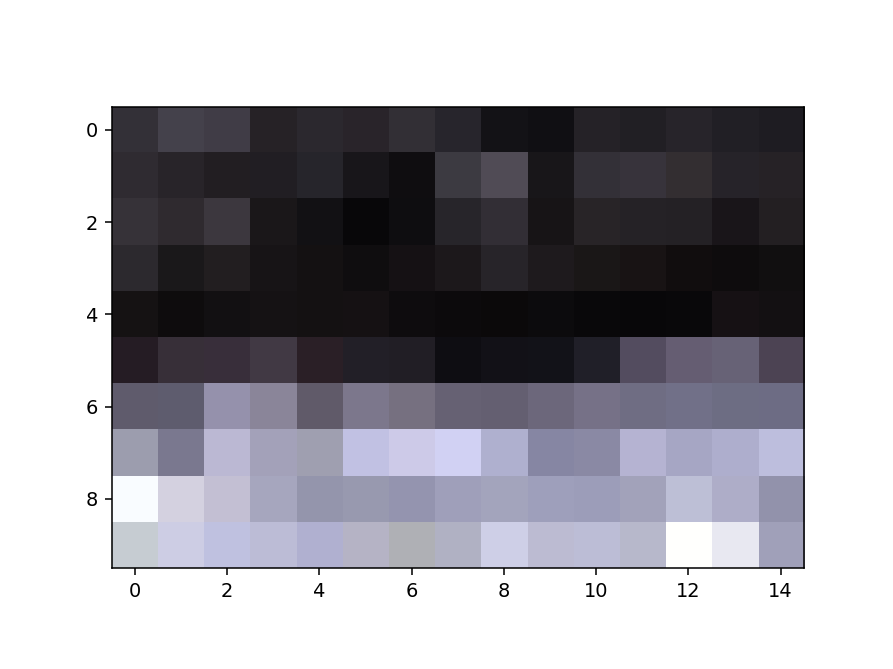

In [13]:
print(descriptors.max(axis=(0,1)))
plt.figure()
plt.imshow(descriptors/(descriptors.max(axis=(0,1))))
plt.show()

<IPython.core.display.Javascript object>


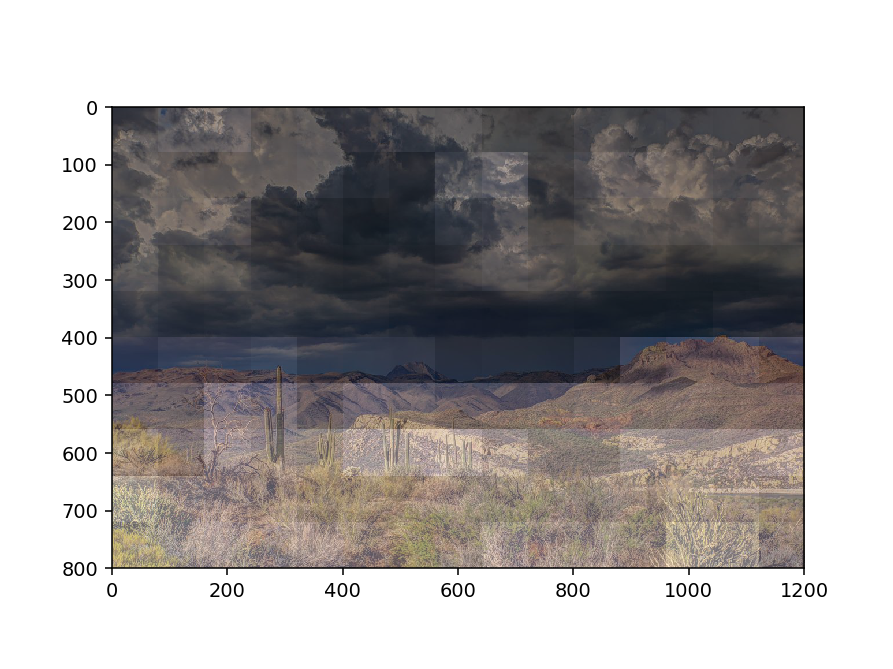

C:\Users\8Utilisateur\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\8Utilisateur\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [8]:
from skimage.transform import resize

ndescriptors = descriptors/descriptors.max(axis=(0,1))

plt.figure()
plt.imshow(im)
plt.imshow(resize(ndescriptors, (im.shape[0],im.shape[1]), order=0), cmap=plt.cm.gray, alpha=0.5)
plt.show()

[0.69169249 0.6955867  0.76558926]


<IPython.core.display.Javascript object>


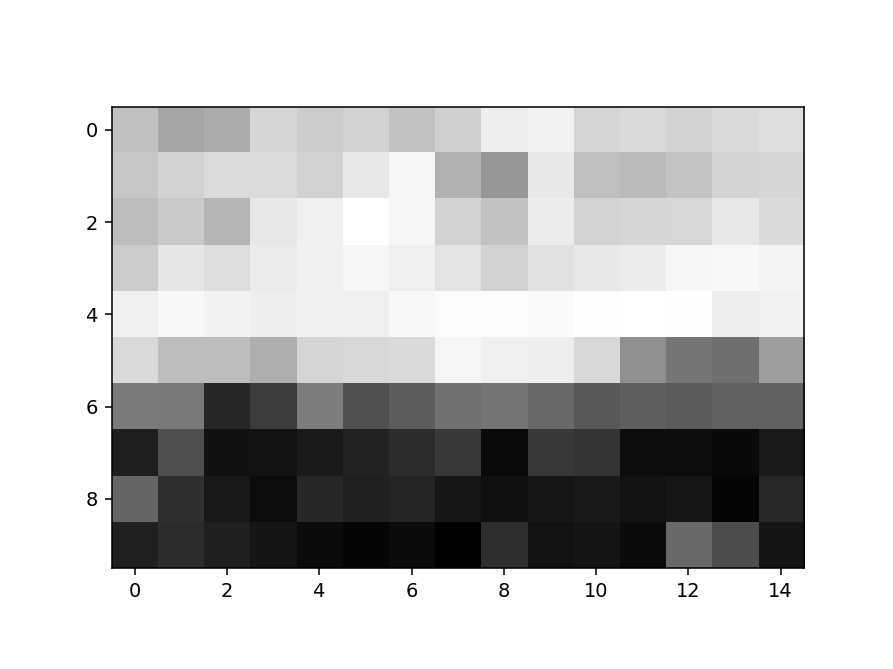

In [14]:
ref = ndescriptors[9,7]
print(ref)

d = np.sqrt(((ndescriptors-ref)**2).sum(axis=2))
plt.figure()
plt.imshow(d, cmap=plt.cm.gray)
plt.show()

<IPython.core.display.Javascript object>


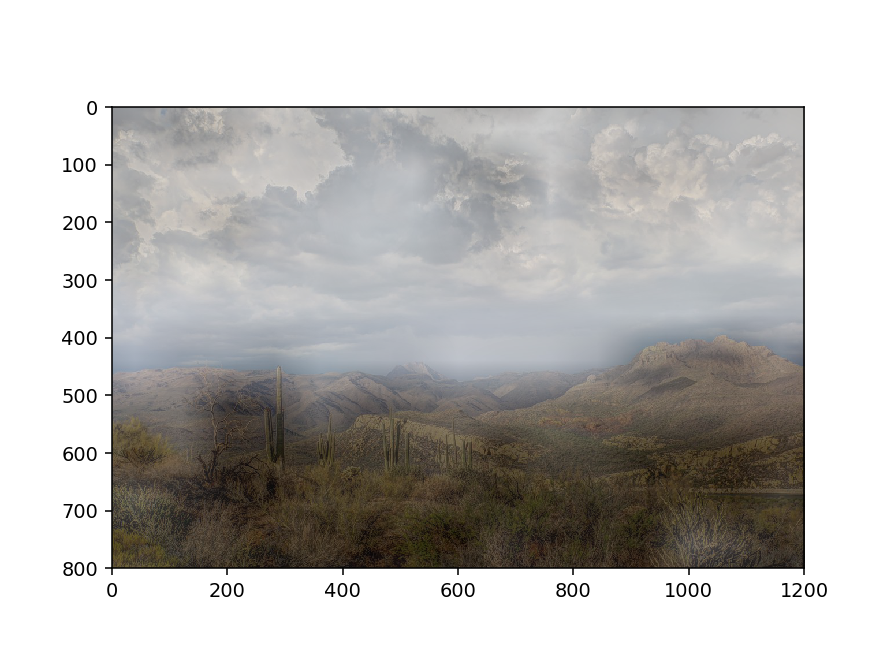

In [23]:
d_ = resize(d, (im.shape[0],im.shape[1]), order=1, mode='reflect')

plt.figure()
plt.imshow(im)
plt.imshow(d_, cmap=plt.cm.gray, alpha=0.7)
plt.show()

<IPython.core.display.Javascript object>


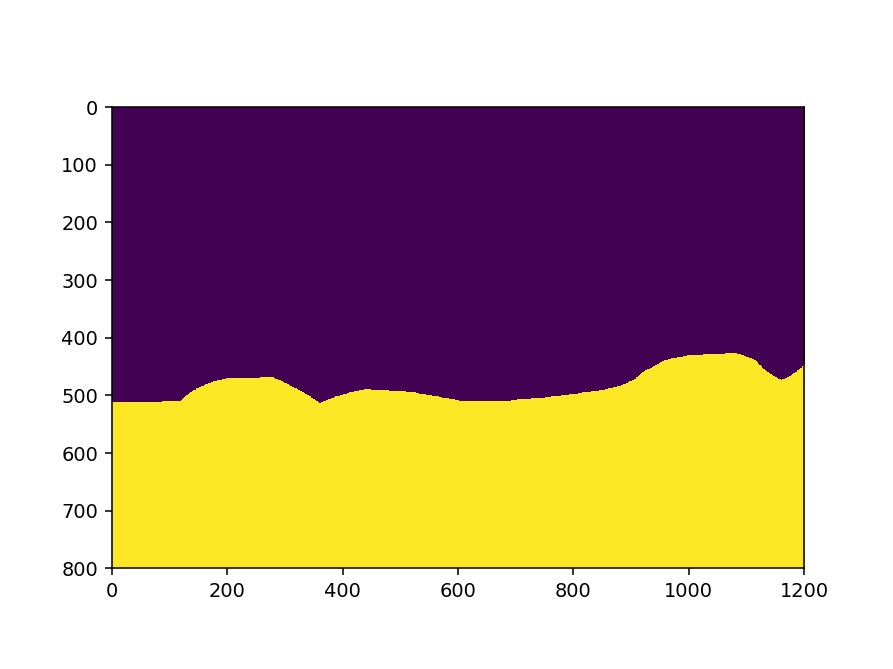

In [24]:
from skimage.filters import threshold_otsu

t = threshold_otsu(d_)
mask = d_<t

plt.figure()
plt.imshow(mask)
plt.show()

<IPython.core.display.Javascript object>


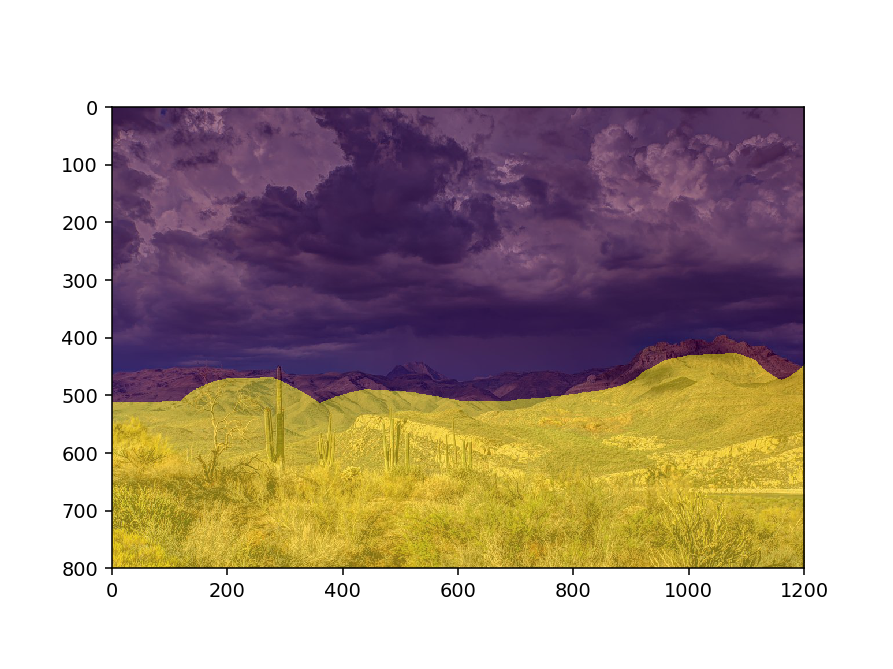

In [25]:
plt.figure()
plt.imshow(im)
plt.imshow(mask, alpha=0.5)
plt.show()